In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Data = pd.read_csv("training1.csv", index_col = 0)
Data.replace(-999,0)
X1 = Data.drop(['Label','DER_lep_eta_centrality','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi'],axis=1)
X1 = Data.drop(['Label'],axis=1)
y1 = Data["Label"]
y1 = pd.factorize(y1)[0]
Data['Catagories'] = y1

from sklearn import svm
# Allows charts to appear in the notebook
%matplotlib inline

Data.shape


from sklearn.model_selection import train_test_split
y1 = Data['Catagories']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20)
Data = pd.DataFrame(data = X_test)
Data2= Data[:30000]
Data1 = pd.DataFrame(data = X_train)
X_test = Data2.drop(['Weight'],axis = 1)
#X_train = Data2.drop(['Weight'],axis = 1)
X_train = X_train.drop(['Weight'],axis = 1)

X_train= X_train[:30000]
X_test=X_test[:30000]
y_train=y_train[:30000]
y_test=y_test[:30000]


Target_labels = ['Signal','Background']
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)


In [2]:
Target_labels = ['Signal','Background']

mlp = svm.SVC(C=1000,kernel='rbf', probability=True) 

mlp.fit(X_train, y_train)
mlp.score(X_train, y_train)
predictions = mlp.predict(X_test)
Prob_Predictions = mlp.predict_proba(X_test)

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


             precision    recall  f1-score   support

     Signal       0.74      0.68      0.71     10257
 Background       0.84      0.88      0.86     19743

avg / total       0.81      0.81      0.81     30000

Training set score: 0.829233
Test set score: 0.808300
The confusion Matrix is // [[ 6929  3328]
 [ 2423 17320]]


C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


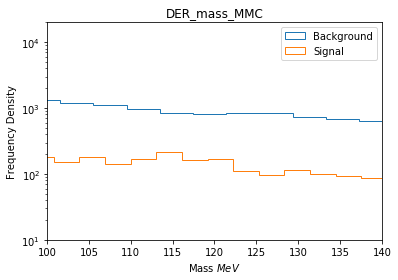

Sum of Signal Weight 3703.3365001374077
Sum of Background Weight 46078.67565632377
Number of background Signals Defined 20648 \ Number of Higgs Signals Defined 9352
no cut 17.252148244871606
First cut, between 110 $MeV$ and 140 $MeV$  16.59613876160952
Cut on probabilities 6.2746346752083015


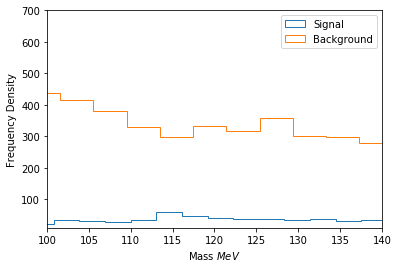

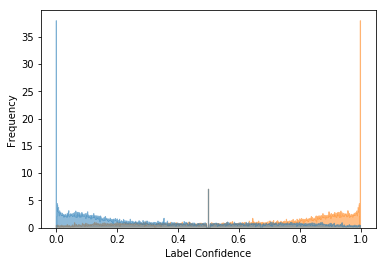

Sum of Signal Weights 386.61778934460136
Sum of Background Weights 2409.3317214699337
Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8 7.876504653383349


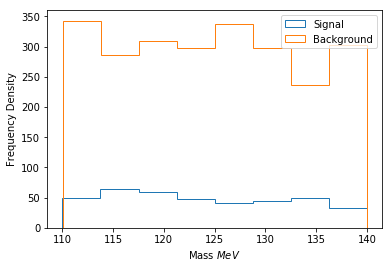

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
Prob_Signal = []
Prob_Background = []
for i,array in enumerate(Prob_Predictions):
    Prob_Signal.append(Prob_Predictions[i,0])
    Prob_Background.append(Prob_Predictions[i,1])
                    
Data2['Signal_Probability'] = Prob_Signal
Data2['Background_Probability'] = Prob_Background


print(classification_report(y_test,predictions,target_names=Target_labels))
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Signal_Probability_Cutoff = 0.71
Background_Probability_Cutoff = 0.86

###RAW DATA PLOT
print('The confusion Matrix is //', confusion_matrix(y_test,predictions))
Data2['Catagory'] = predictions
Test_Signal = Data2['Catagory'] == 0
Test_Background = Data2['Catagory'] == 1
Test_Signal2 = Data2[Test_Signal]
Test_Background2 = Data2[Test_Background]
Test_Signal_Weight = Test_Signal2['Weight']
Test_Background_Weight = Test_Background2['Weight']
Test_Sum_Signal = Test_Signal_Weight.sum()
Test_Sum_Background = Test_Background_Weight.sum()
u = Test_Background2['DER_mass_MMC']
#u2 = Test_Background2['DER_mass_vis']
v = Test_Signal2['DER_mass_MMC'] 
#v2 = Test_Signal2['DER_mass_vis'] 
num_bins = 500
n,bins,patches = plt.hist(u,num_bins,histtype = 'step',weights = Test_Background_Weight, log = True, label = ('Background')  )
n,bins,patches = plt.hist(v,num_bins,histtype = 'step',weights = Test_Signal_Weight, log = True, label = ('Signal'))
plt.ylabel('Frequency Density')
plt.xlabel('Mass $MeV$')
plt.title('DER_mass_MMC')
plt.axis([100,140,10,20000])
plt.legend()
plt.show(block=False)
                
                
number_of_background =len(Test_Background2)
number_of_signals = len(Test_Signal2)
print('Sum of Signal Weight',Test_Sum_Signal,)
print('Sum of Background Weight',Test_Sum_Background)
print('Number of background Signals Defined',number_of_background,'\\ Number of Higgs Signals Defined',number_of_signals,)
sqrt = Test_Sum_Signal/(Test_Sum_Background)**0.5
print('no cut',sqrt,)
                
## CUTTING ENERGIES               
            
L = Test_Signal2['DER_mass_MMC'].between (110,140, inclusive = True)
L2 = (Test_Signal2['Signal_Probability'] >= Signal_Probability_Cutoff)
O = Test_Background2['DER_mass_MMC'].between(110,140,inclusive = True)
O2 = (Test_Background2['Background_Probability']>= Background_Probability_Cutoff)
D = Test_Signal2[L]
D2 = Test_Signal2[L2]
F = Test_Background2[O]
F2 =Test_Background2[O2]
delta = D['Weight'].sum()
pi = F['Weight'].sum()
print('First cut, between 110 $MeV$ and 140 $MeV$ ', delta/(pi**0.5),)
sigma = (D2['Weight'].sum())/((F2['Weight'].sum())**0.5)
print('Cut on probabilities',sigma,)
                               
n,bins,patches = plt.hist(D2['DER_mass_MMC'],500,histtype = 'step', label = ('Signal'), weights = D2['Weight'])
n,bins,patches = plt.hist(F2['DER_mass_MMC'],500,histtype = 'step', label = ('Background'),weights = F2['Weight'])
plt.axis([100,140,10,700])
plt.ylabel('Frequency Density')
plt.xlabel('Mass $MeV$')
plt.legend()
plt.show(block=False)


### LABEL CONFIDENCE
n,bins,patches = plt.hist(Prob_Predictions,1000,histtype = 'step', label = ('Probability of signal', 'Probability of Background'), density = 1, fill = 'green', alpha = 0.5)
#plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Label Confidence')
plt.show(block=False)
#plt.axis([100,140,10,700])
                

### CUTTING PROBABILITIES
Prob_Cut_Signal = (D['Signal_Probability'] >= Signal_Probability_Cutoff)
Prob_Cut_Background = (F['Background_Probability'] >= Background_Probability_Cutoff)
                
Prob_Cut_Signal2 = D[Prob_Cut_Signal]
Prob_Cut_Background2 = F[Prob_Cut_Background]
                
beta = Prob_Cut_Signal2['Weight'].sum()
gamma = Prob_Cut_Background2['Weight'].sum()
print('Sum of Signal Weights', beta,)
print('Sum of Background Weights',gamma,)
sqrt2 = beta/gamma**0.5
print('Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8',sqrt2,)
                
n,bins,patches = plt.hist(Prob_Cut_Signal2['DER_mass_MMC'],8,histtype = 'step', label = ('Signal'), weights = Prob_Cut_Signal2['Weight'])
n,bins,patches = plt.hist(Prob_Cut_Background2['DER_mass_MMC'],8,histtype = 'step', label = ('Background'),weights = Prob_Cut_Background2['Weight'])
#plt.axis([100,140,10,30])
plt.ylabel('Frequency Density')
plt.xlabel('Mass $MeV$')
plt.legend()
plt.show(block=False)
                

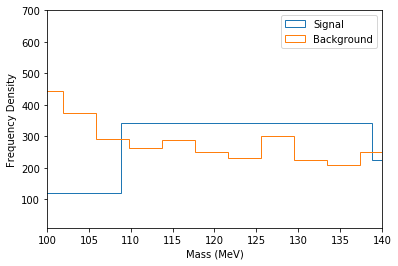

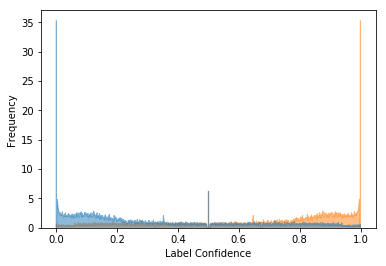

In [4]:
n,bins,patches = plt.hist(D2['DER_mass_MMC'],50,histtype = 'step', label = ('Signal'), weights = D2['Weight'])
n,bins,patches = plt.hist(F2['DER_mass_MMC'],500,histtype = 'step', label = ('Background'),weights = F2['Weight'])
plt.axis([100,140,10,700])
plt.ylabel('Frequency Density')
plt.xlabel('Mass (MeV)')
plt.legend()
plt.show(block=False)

n,bins,patches = plt.hist(Prob_Predictions,1000,histtype = 'step', label = ('Probability of signal', 'Probability of Background'), density = 1, fill = 'green', alpha = 0.5)
#plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Label Confidence')
plt.show(block=False)

4096